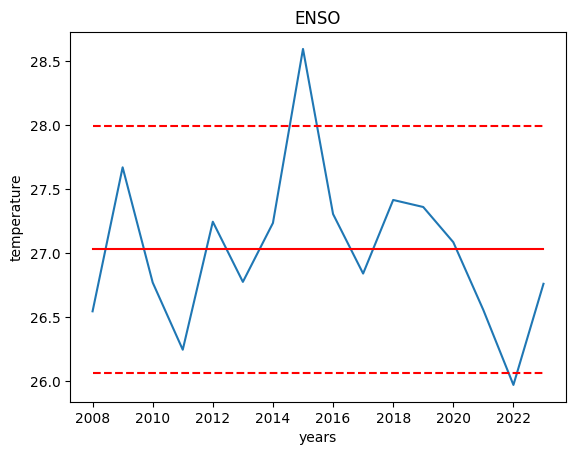

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data from file
df = pd.read_csv('./2008-2023NINO3.4.csv')
YR_LABEL_TICK_VALUE = 3
MONTH_COUNT = 12

mon_meanlist = []
for i in range(df.YR.min(), df.YR.max() + 1):
    mon_meanlist.append(df[df.YR == i].loc[:,'NINO3.4'].median())

pltX = df.YR.drop_duplicates().values
pltY = mon_meanlist
plt.plot(pltX, pltY)

meanNino34 = df['NINO3.4'].mean()
stdNino34 = df['NINO3.4'].std()

dfEl = df[df['NINO3.4'] > (meanNino34 + stdNino34)]
dfLa = df[df['NINO3.4'] < (meanNino34 + stdNino34)]

plt.plot([df.YR.min(), df.YR.max()], [meanNino34, meanNino34], 'r-')
plt.plot([df.YR.min(), df.YR.max()], [meanNino34 + stdNino34, meanNino34 + stdNino34], 'r--')
plt.plot([df.YR.min(), df.YR.max()], [meanNino34 - stdNino34, meanNino34 - stdNino34], 'r--')

plt.xlabel('years')
plt.ylabel('temperature')
plt.title('ENSO')
plt.show()

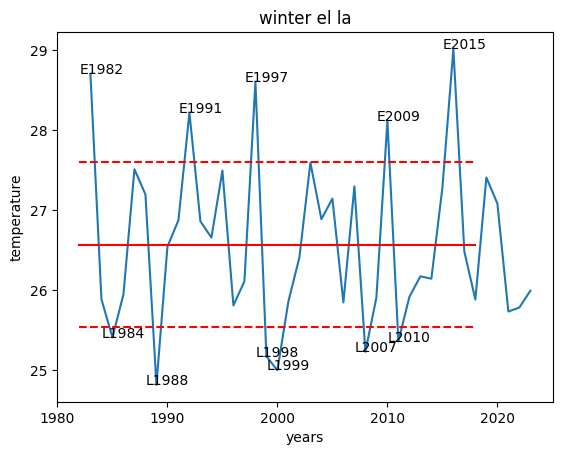

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from file
data = np.loadtxt('./sstoi.indices.txt', skiprows=1)

yr, mo, n12, n12a, n3, n3a, n4, n4a, n34, n34a = data.T

# Calculate DJF mean for Nino 3.4 region
idx = np.where(mo == 1)[0][1:]
n34_djf = np.zeros((len(idx),))
j = 0
for i in idx:
    if i > 1:
        j += 1
        n34_djf[j-1] = (n34[i-1] + n34[i] + n34[i+1]) / 3

# Calculate mean and standard deviation
mn341 = np.mean(n34_djf)
sn341 = np.std(n34_djf)

# Find El Nino and La Nina years
idx5 = np.where((mo == 1) | (mo == 12) | (mo == 2))[0][2:]
yr1 = yr[idx5]
yr2 = np.unique(yr1)[:-1]
idx2 = np.where(n34_djf > mn341 + sn341)[0]
el = yr2[idx2]
n34el = n34_djf[idx2]
idx3 = np.where(n34_djf < mn341 - sn341)[0]
la = yr2[idx3]
n34la = n34_djf[idx3]

# Plot data
plt.plot(yr[idx], n34_djf)
plt.plot([1982, 2018], [mn341, mn341], 'r-')
plt.plot([1982, 2018], [mn341 + sn341, mn341 + sn341], 'r--')
plt.plot([1982, 2018], [mn341 - sn341, mn341 - sn341], 'r--')
for i in range(len(el)):
    plt.text(el[i], n34el[i], f'E{int(el[i])}')
for i in range(len(la)):
    plt.text(la[i], n34la[i], f'L{int(la[i])}')
plt.xlabel('years')
plt.ylabel('temperature')
plt.title('winter el la')
plt.savefig('test.png')
plt.show()